# Theano implementation of MNIST Handwritten Digits Classifier

In [1]:
# import packages
import theano as th
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sys, os
%matplotlib inline

In [5]:
# Load the Training and Test data
df = pd.read_csv("..\..\DataSet\mnist_train.csv", encoding="UTF-8")

In [6]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# input and output Split
X = df.iloc[:,1:].to_numpy() / 255
Y = df.iloc[:,0].to_numpy()

In [8]:
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [9]:
# Train and Test split
Xtrain, Xtest, Ytrain, Ytest = Xtrain[:-1000], Xtest[-1000:],Ytrain[:-1000],Ytest[-1000:]

In [10]:
# Shuffle the data prior training
Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=1)

In [11]:
# show image func
def showImage(x, y):
    plt.title("Digit: " + str(y))
    plt.imshow(x.reshape(28,28))

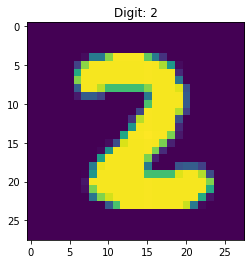

In [12]:
# Sample photo
photo = 0
showImage(Xtrain[photo], Ytrain[photo])

In [13]:
def oneHotEncode(y):
    # Target index matrix from Ytrain
    T = np.zeros((y.shape[0], np.unique(y).shape[0]))

    for i,val in enumerate(y):
        T[i,val] = 1

    return T

In [19]:
def sigmoid(z):
    return 1 / (1 + th.tensor.exp(-z))

In [20]:
def tanh(z):
    return (th.tensor.exp(z)-th.tensor.exp(-z)) / (th.tensor.exp(z)+th.tensor.exp(-z))

In [21]:
def softmax(z):
    return th.tensor.exp(z) / th.tensor.sum(np.exp(z), axis=1, keepdims=True)

In [22]:
def nonlinearDT(z, func):
    if func == "sigmoid":
        return z*(1-z)
    if func == "tanh":
        return (1-z**2)

In [54]:
def accuracy(y, yhat):
    return np.mean(y==yhat)

In [67]:
N = Xtrain.shape[0]
D = Xtrain.shape[1]
M = 100
K = 10
lr = 0.1
iterations = 100
Ctrain = []
np.random.seed(1)

T = oneHotEncode(Ytrain)

Xm = th.tensor.matrix('Xtrain')
Ym = th.tensor.matrix('T')

W1_init = np.random.randn(D,M)
b1_init = np.random.randn(M)
W2_init = np.random.randn(M,K)
b2_init = np.random.randn(K)

W1 = th.shared(W1_init, "w1")
b1 = th.shared(b1_init, "b1")
W2 = th.shared(W2_init, "w2")
b2 = th.shared(b2_init, "b2")

Z1 = sigmoid(th.tensor.dot(Xm,W1)+b1)
Z2 = softmax(th.tensor.dot(Z1,W2)+b2)

cost = -(Ym*th.tensor.log(Z2)).mean()
predict = th.tensor.argmax(Z2, axis=1)

W1_update = W1 - lr*th.tensor.grad(cost,W1)
b1_update = b1 - lr*th.tensor.grad(cost,b1)
W2_update = W2 - lr*th.tensor.grad(cost,W2)
b2_update = b2 - lr*th.tensor.grad(cost,b2)

train = th.function(inputs=(Xm,Ym), outputs=[cost,predict], updates=[(W1,W1_update),(b1,b1_update),(W2,W2_update),(b2,b2_update)])

for i in range(iterations+1):
    c,yhat = train(Xtrain,T)
    Ctrain.append(c)
    if i%10==0:
        print("Iteration: "+ str(i)+" | Cost: "+ str(c) + " | Accuracy: " + str(accuracy(Ytrain,yhat)*100) +"%")

Iteration: 0 | Cost: 0.7720872586557195 | Accuracy: 9.679661016949153%
Iteration: 10 | Cost: 0.7418896118434228 | Accuracy: 10.220338983050848%
Iteration: 20 | Cost: 0.7180974732859242 | Accuracy: 10.627118644067798%
Iteration: 30 | Cost: 0.697831538072327 | Accuracy: 11.06271186440678%
Iteration: 40 | Cost: 0.6806551286593746 | Accuracy: 11.459322033898305%
Iteration: 50 | Cost: 0.6656363809310013 | Accuracy: 11.76271186440678%
Iteration: 60 | Cost: 0.6528483466035154 | Accuracy: 12.09322033898305%
Iteration: 70 | Cost: 0.6414124905693006 | Accuracy: 12.386440677966101%
Iteration: 80 | Cost: 0.6310858847987009 | Accuracy: 12.642372881355932%
Iteration: 90 | Cost: 0.6218593869834842 | Accuracy: 12.923728813559322%
Iteration: 100 | Cost: 0.613270526113575 | Accuracy: 13.177966101694915%


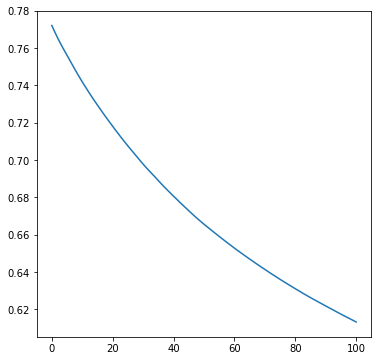

In [68]:
# Cost plot
plt.figure(figsize=(6,6))
plt.plot(Ctrain)
plt.show()